<a href="https://colab.research.google.com/github/Achint-7/Exploratory-Data-Analysis/blob/main/21BDS0190_EDA_Chapter7_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#21BDS0190 ACHINT TRIPATHI  <BR> https://github.com/Achint-7/Exploratory-Data-Analysis <br>  EXPLORATORY DATA ANALYSIS IMPLEMENTATION OF CHAPTER - 7 IN PYTHON  <br> Exploratory-Data-Analysis
DATA SET USED : Lithium Ion Batteries <br> DATA SET LINK : https://github.com/salemprakash/EDA/blob/main/Data/lithium-ion%20batteries.csv


In [1]:
# Install necessary libraries
!pip install -U seaborn scikit-learn statsmodels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/lithium-ion%20batteries.csv'
df = pd.read_csv(url)

# Replace '?' with NaN in the entire dataset
df.replace('?', np.nan, inplace=True)

# Convert relevant columns to numeric
numeric_columns_to_fill = [
    'Formation Energy (eV)',
    'E Above Hull (eV)',
    'Band Gap (eV)',
    'Nsites',
    'Density (gm/cc)',
    'Volume'
]
df[numeric_columns_to_fill] = df[numeric_columns_to_fill].apply(pd.to_numeric, errors='coerce')

# Fill NaN values with the mean for specific numeric columns
for column in numeric_columns_to_fill:
    df[column].fillna(df[column].mean(), inplace=True)

# Display the first few rows of the cleaned data
df.head()

<ipython-input-3-5e4015571c14>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


#Pair Plot to Identify Relationships

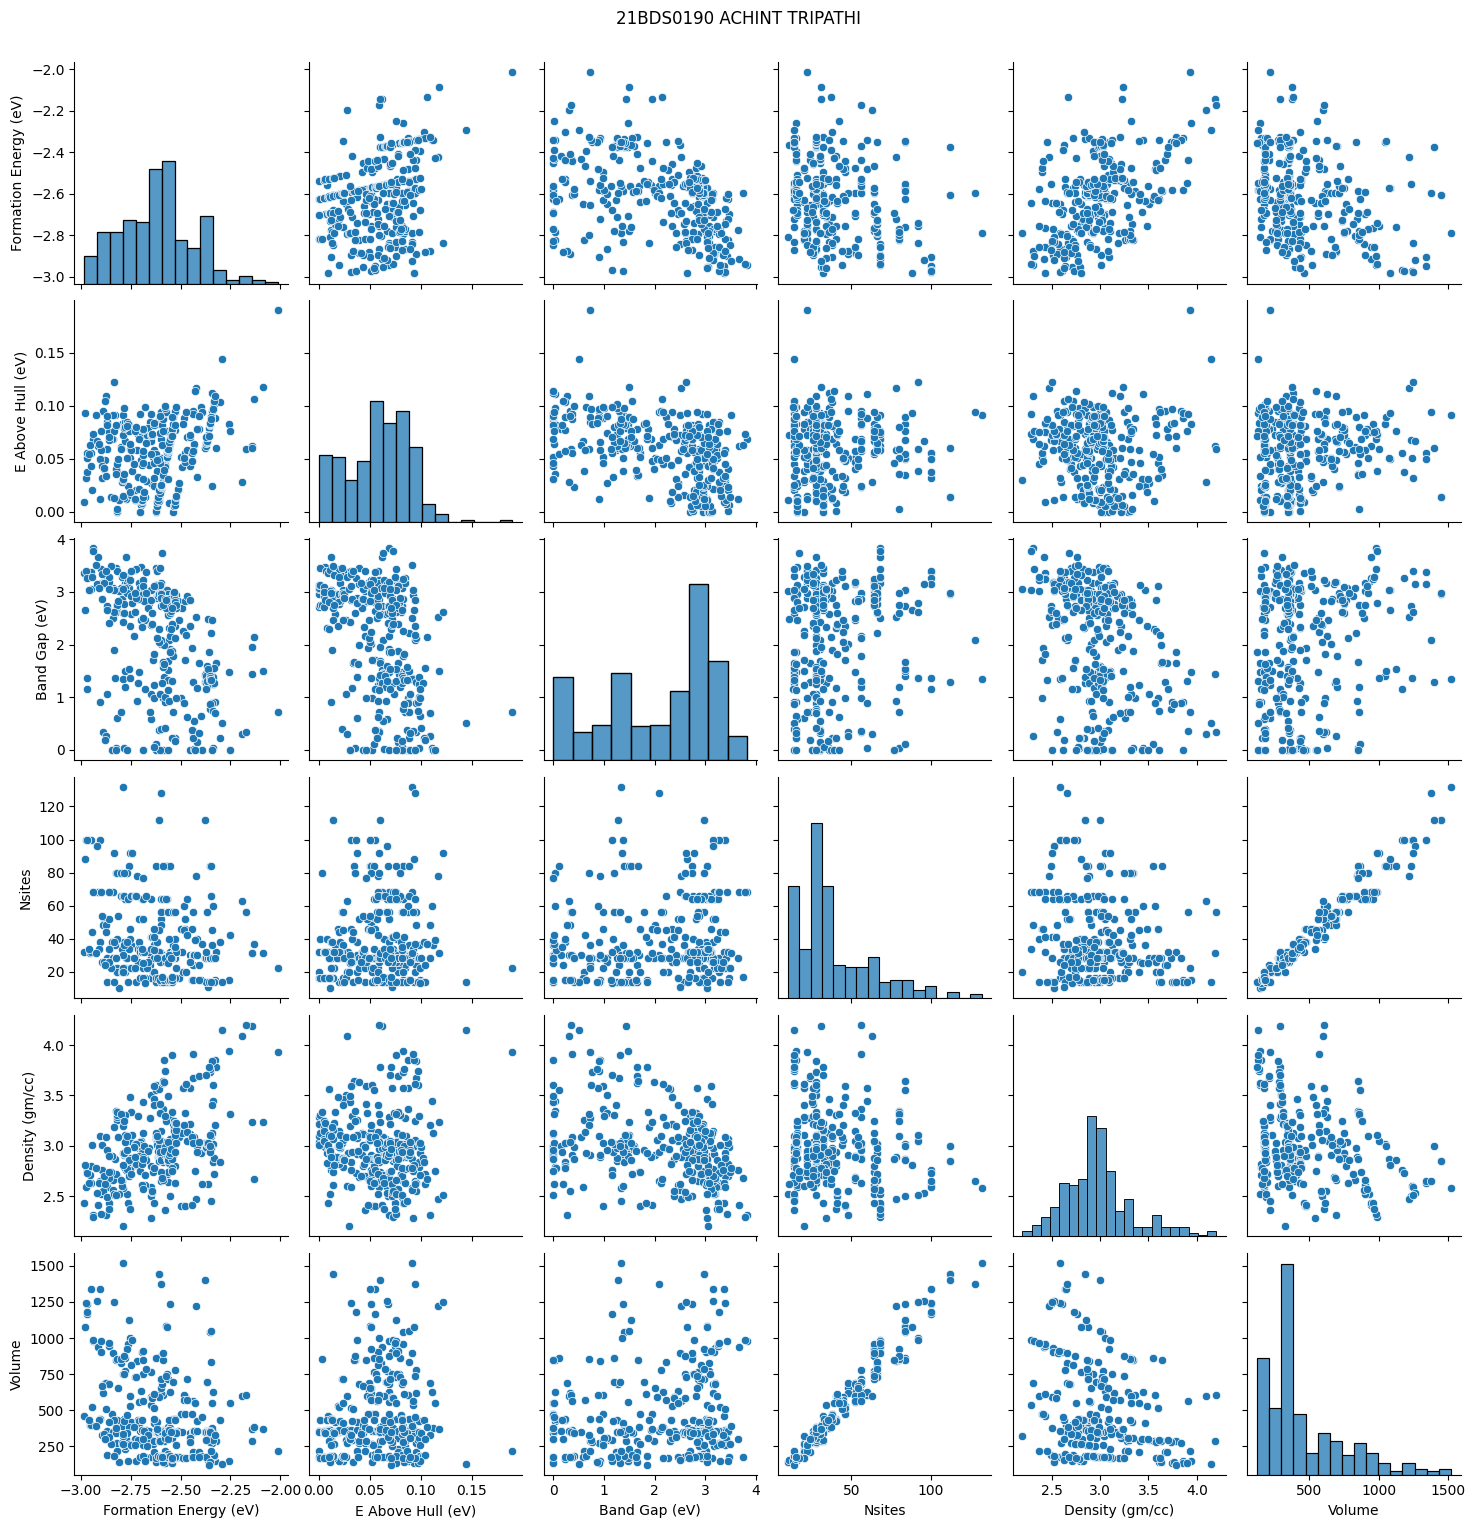

In [14]:
# Plot pairplot to identify relationships
sns.pairplot(df, vars=numeric_columns_to_fill)
plt.suptitle('21BDS0190 ACHINT TRIPATHI', y=1.02)
plt.show()


#Selecting Independent and Dependent Variables

In [5]:
# Select independent (X) and dependent (Y) variables
X = df[['Volume']]
y = df['Density (gm/cc)']

#Split the Dataset

In [6]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

#Fit Simple Linear Regression Model

In [7]:
# Fit Simple Linear Regression model
reg1 = LinearRegression()
reg1.fit(X_train, y_train)

LinearRegression()

In [8]:
# Predict on training set to check residuals
y_train_pred = reg1.predict(X_train)

# Calculate residuals
residuals = y_train - y_train_pred

# Summary using statsmodels
X_train_sm = sm.add_constant(X_train)  # Adds a constant term to the predictor
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:        Density (gm/cc)   R-squared:                       0.106
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     26.59
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           5.52e-07
Time:                        10:23:19   Log-Likelihood:                -76.021
No. Observations:                 226   AIC:                             156.0
Df Residuals:                     224   BIC:                             162.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.1786      0.044     72.434      0.0

In [9]:
# Predict the test set results
y_pred = reg1.predict(X_test)

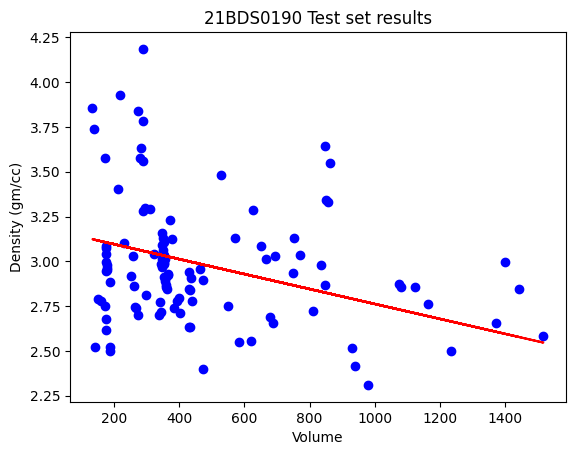

In [15]:
# Visualize the test set results
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red')
plt.title('21BDS0190 Test set results')
plt.xlabel('Volume')
plt.ylabel('Density (gm/cc)')
plt.show()

#Multiple Linear Regression with Log Transformation

In [11]:
# Log transformation for multiple linear regression
df['log_volume'] = np.log(df['Volume'])

# Select features for multiple linear regression
X_multi = df[['log_volume', 'Formation Energy (eV)', 'E Above Hull (eV)', 'Band Gap (eV)', 'Nsites']]
y_multi = df['Density (gm/cc)']

# Split the dataset into training and test sets
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=1/3, random_state=42)

# Fit the model
reg2 = LinearRegression()
reg2.fit(X_train_multi, y_train_multi)

# Summary using statsmodels
X_train_multi_sm = sm.add_constant(X_train_multi)  # Adds a constant term to the predictor
model_sm_multi = sm.OLS(y_train_multi, X_train_multi_sm).fit()
print(model_sm_multi.summary())

                            OLS Regression Results                            
Dep. Variable:        Density (gm/cc)   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     35.32
Date:                Sat, 16 Nov 2024   Prob (F-statistic):           1.87e-26
Time:                        10:24:09   Log-Likelihood:                -22.101
No. Observations:                 226   AIC:                             56.20
Df Residuals:                     220   BIC:                             76.73
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     8.49

#Compare Predicted and Residual Values

In [17]:
# Predict and calculate residuals for multiple regression
y_pred_multi = reg2.predict(X_test_multi)
residuals_multi = y_test_multi - y_pred_multi

# Create a dataframe for predicted and residual values
pred_df = pd.DataFrame(y_pred_multi, columns=['Predicted'])
resid_df = pd.DataFrame(residuals_multi, columns=['Residual'])
combined_df = pd.concat([pred_df, resid_df.reset_index(drop=True)], axis=1)
combined_df.head()

,Predicted,Residual
0,2.965631,NaN
1,3.337777,NaN
2,3.564624,NaN
3,2.943138,NaN
4,2.608977,NaN


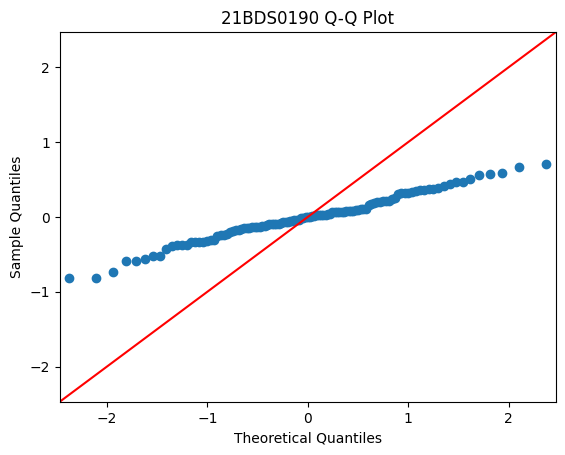

In [18]:
# Q-Q plot
sm.qqplot(residuals_multi, line='45')
plt.title('21BDS0190 Q-Q Plot')
plt.show()